In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Import Data**

In [ ]:
# Import data
df=pd.read_csv('/content/drive/MyDrive/Dry_Bean_Dataset.xlsx - Dry_Beans_Dataset.csv')

In [ ]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,NaN,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,NaN,0.676884,0.996767,DERMASON
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,NaN,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


**Check dataset size**


In [ ]:
# Check dataset size
print(df.shape)

(13611, 17)


**Find and treat missing values (If any)**

In [ ]:
# Find and treat missing values (If any)
print(df.isna().sum()) # Check for missing values

Area               1
Perimeter          2
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       3
ConvexArea         2
EquivDiameter      4
Extent             0
Solidity           2
roundness          2
Compactness        0
ShapeFactor1       3
ShapeFactor2       5
ShapeFactor3       2
ShapeFactor4       2
Class              0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.shape)

(13577, 17)


**Check column types and describe which columns are numerical or categorical**

In [ ]:
# Check column types and describe which columns are numerical or categorical
print(df.dtypes) # Check column data types

Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


**Perform Univariate analysis**
1. Calculate mean, median, std dev, and quartiles of numerical data
2. Plot histogram of ‘Class.’
3. Check the distribution of numerical variables and comment on it

In [ ]:
# Perform Univariate analysis
df.describe() # Summary statistics of numerical columns

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000
mean,53084.658172,855.630970,320.317442,202.290765,1.583994,0.751298,53805.386610,253.148009,0.749690,0.987136,0.873131,0.799643,0.006563,0.001714,0.643219,0.995056
std,29345.991109,214.369462,85.691077,45.017038,0.246354,0.091582,29797.085052,59.210049,0.049121,0.004663,0.059478,0.061567,0.001129,0.000594,0.098722,0.004369
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36351.000000,703.858000,253.480590,175.777010,1.433078,0.716294,36736.000000,215.136075,0.718526,0.985659,0.832010,0.762333,0.005898,0.001153,0.581152,0.993690
50%,44697.000000,795.624000,297.233562,192.426897,1.551610,0.764611,45234.000000,238.558144,0.759785,0.988278,0.883006,0.801098,0.006646,0.001691,0.641758,0.996379
75%,61377.000000,977.412000,376.521121,217.153824,1.707470,0.810556,62348.000000,279.548965,0.786852,0.990009,0.916711,0.833949,0.007273,0.002168,0.695471,0.997875
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


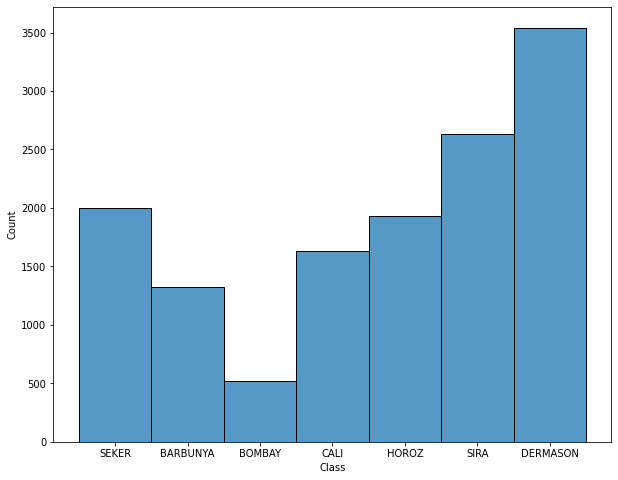

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Class') # Plot histogram of ‘Class.’

In [ ]:
# # Check the distribution of numerical variables and comment on it
# df_num = df.select_dtypes(include=['float64']) # Subset the numerical columns
# sns.pairplot(df_num) # Plot pairplots to check the distribution of numerical variables

**Perform Bivariate analysis**
1. Plot box plot of ‘AREA’ segregated by different classes (Hint take ‘Class’ on the y-axis)
2. Plot box plot of ‘PERIMETER’ segregated by different classes 
3. Calculate Pearson correlation, and plot the heatmap


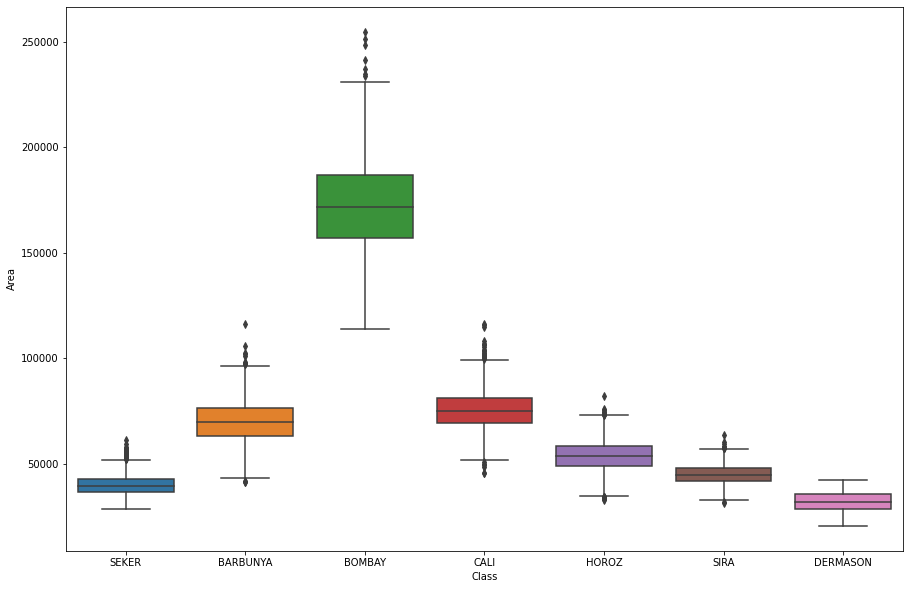

In [ ]:
# Perform Bivariate analysis
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Class', y='Area') # Plot box plot of ‘AREA’ segregated by different classes (Hint take ‘Class’ on the y-axis)

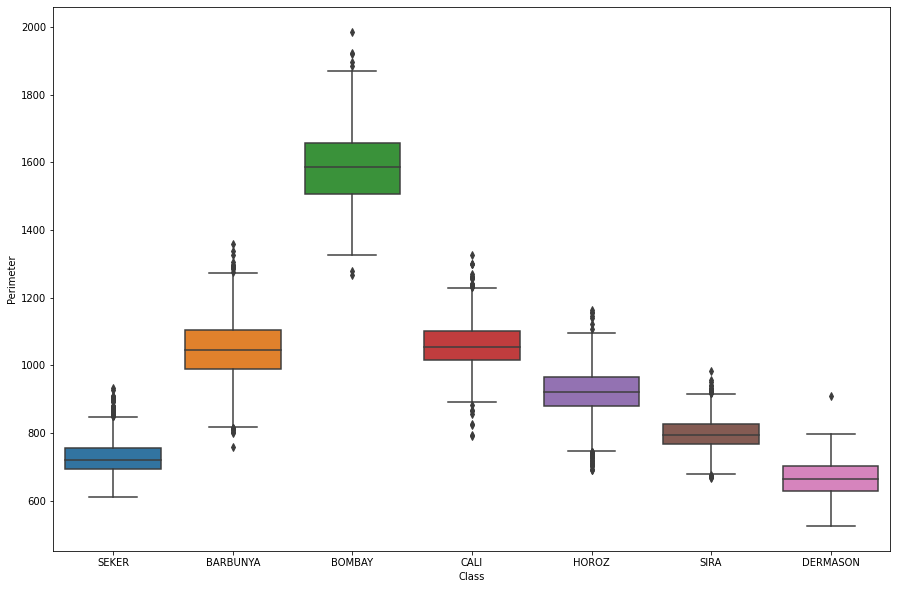

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Class', y='Perimeter') # Plot box plot of ‘PERIMETER’ segregated by different classes

In [ ]:
# df.columns

In [ ]:
# col=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
#        'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
#        'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
#        'ShapeFactor3', 'ShapeFactor4']

In [ ]:
# for c in col:
#   percentile25=df[c].quantile(0.25)
#   percentile75=df[c].quantile(0.75)
#   iqr=percentile75-percentile25
#   upper_limit=percentile75+(1.5*iqr)
#   lower_limit=percentile25-(1.5*iqr)
#   df=df[df[c]<=upper_limit]
#   df=df[df[c]>=lower_limit]
#   plt.figure()
#   sns.boxplot(y=c, data=df)

In [ ]:
# from scipy import stats
# # Identify the numerical columns
# num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# # Calculate the z-score for each value in the numerical columns
# z_scores = np.abs(stats.zscore(df[num_cols]))

# # Identify the indices of values with z-scores greater than 3 (outliers)
# outlier_indices = np.where(z_scores > 3)

# # Remove the rows containing outliers
# df = df.drop(df.index[outlier_indices[0]])

In [ ]:
df.shape

(13577, 17)

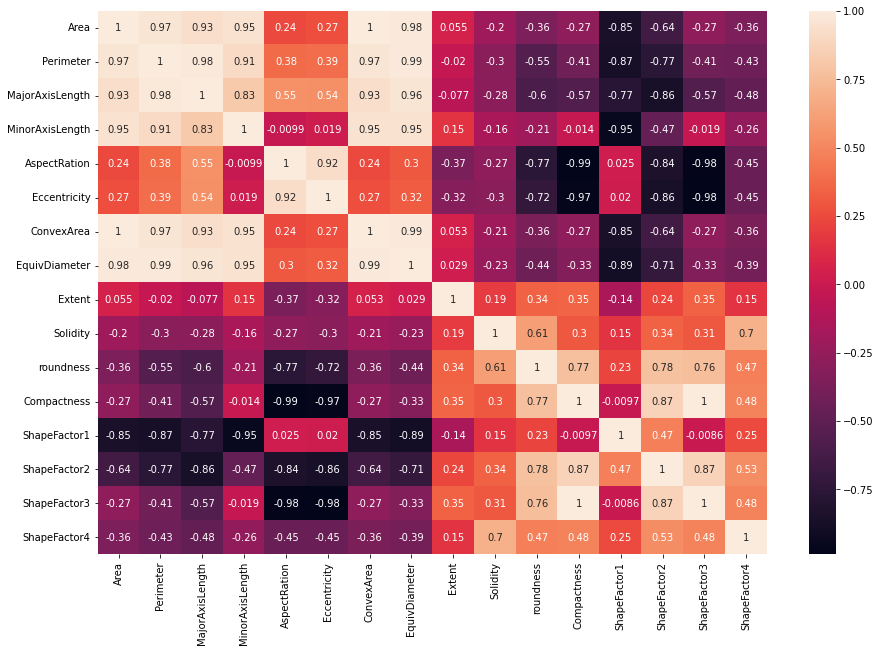

In [ ]:
# Calculate Pearson correlation, and plot the heatmap
plt.figure(figsize=(15, 10))
corr = df.corr() # Calculate correlation matrix
sns.heatmap(corr, annot=True) # Plot heatmap of correlations

**Drop columns having high correlation and any unnecessary columns**


In [ ]:
# # Drop columns having high correlation and any unnecessary columns
# plt.figure(figsize=(15, 10))
# df = df.drop(['ShapeFactor1', 'ShapeFactor4'], axis=1) # Drop unnecessary columns
# corr = df.corr() # Calculate correlation matrix after dropping columns
# sns.heatmap(corr, annot=True) # Plot heatmap of correlations after dropping columns

**Split into train and test set**


In [ ]:
# Split into train and test set
X = df.drop(['Class'], axis=1) # Separate predictors from target
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

By setting a specific value for random_state, we can ensure that every time we split the data, we get the same split. This is useful for reproducibility purposes.

**Scale the variables**

In [ ]:
# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Use KNN to predict “Class.”**

In [ ]:
# Use KNN to predict “Class.”
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy score:  0.9207167403043691
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       159
        CALI       0.92      0.95      0.93       480
    DERMASON       0.90      0.93      0.91      1031
       HOROZ       0.95      0.95      0.95       593
       SEKER       0.96      0.93      0.94       611
        SIRA       0.87      0.86      0.86       803

    accuracy                           0.92      4074
   macro avg       0.94      0.93      0.93      4074
weighted avg       0.92      0.92      0.92      4074

[[356   0  27   1   2   3   8]
 [  0 159   0   0   0   0   0]
 [  8   0 454   0  13   1   4]
 [  0   0   0 956   2  15  58]
 [  1   0  10   3 566   0  13]
 [  2   0   0  17   1 569  22]
 [  3   0   1  90  12   6 691]]


**Use the elbow method to select the best K in KNN.**

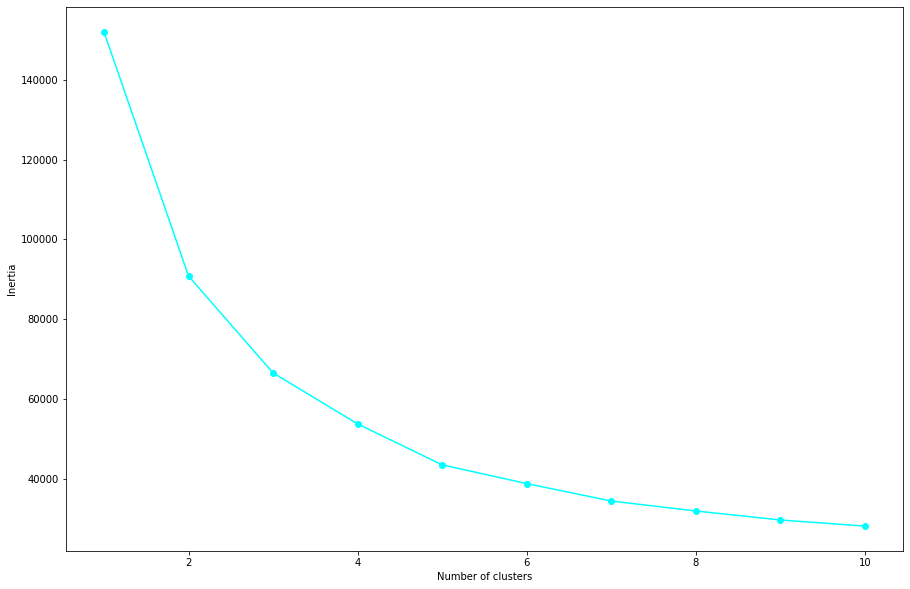

In [ ]:
# Use the elbow method to select the best K in KNN.
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Drop the “Class” column, and cluster the data using K means.**

**Take K = 7, and do K means clustering**

In [ ]:
# Drop the “Class” column, and cluster the data using K means.
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_train_scaled)
X_train_clustered = kmeans.predict(X_train_scaled)

In [ ]:
X_train_clustered

array([2, 3, 6, ..., 5, 3, 2], dtype=int32)

**Use the Elbow method to find the best K for K means**

In [ ]:
# Apply the same scaling transformation to the test set
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Predict the cluster labels of the test set
X_test_clustered = kmeans.predict(X_test_scaled)

In [ ]:
X_test_clustered

array([3, 0, 6, ..., 0, 3, 3], dtype=int32)

In [ ]:
# Evaluate the clustering performance on the test set
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_test_scaled, X_test_clustered)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.30797764076004164


**PCA**
1. Decrease the dimensions to two using PCA 
2. Use K means clustering with K found earlier
3. Plot clusters


In [ ]:
# 1. Decrease the dimensions to two using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
X_train_pca

array([[ 1.4178708 , -2.07516409],
       [-3.37539646,  2.24093379],
       [-0.0762672 , -0.30411134],
       ...,
       [ 3.45493284,  1.82155497],
       [-4.46963663,  3.77666759],
       [ 3.83783931, -2.94227419]])

In [ ]:
# 2. Use K means clustering with K found earlier
kmeans_pca = KMeans(n_clusters=7, random_state=42)
kmeans_pca.fit(X_train_pca)
X_train_clustered_pca = kmeans_pca.predict(X_train_pca)

In [ ]:
X_train_clustered_pca

array([1, 4, 6, ..., 2, 4, 1], dtype=int32)

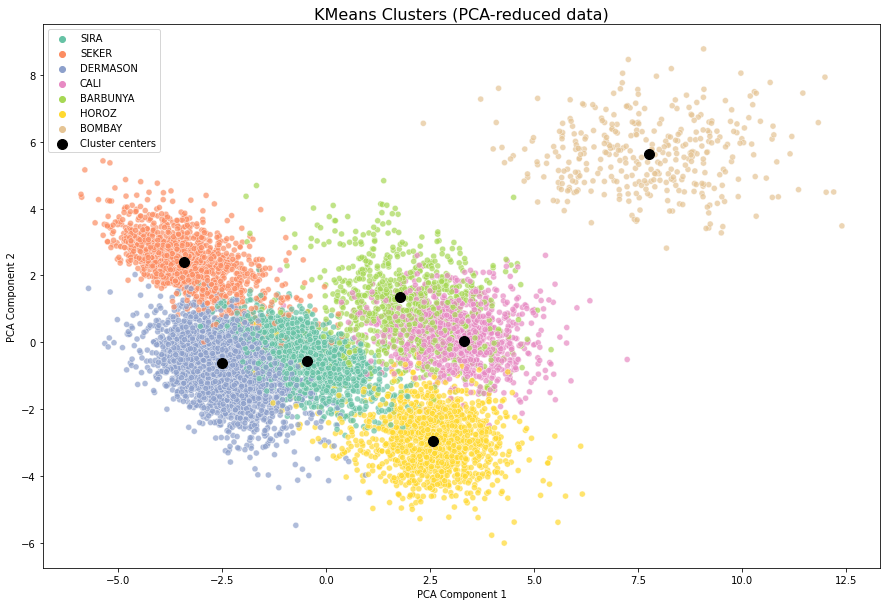

In [ ]:
# Plot the KMeans clusters in a 2D space
plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train,
                palette='Set2', alpha=0.7, legend='full')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=100, c='black', label='Cluster centers')
plt.title('KMeans Clusters (PCA-reduced data)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)



In [ ]:
# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Train a logistic regression model
lr = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=10000, random_state=42)
lr.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)



In [ ]:
# Evaluate the performance of the logistic regression model
print("Accuracy of logistic regression model: {:.2f}".format(accuracy_score(y_test, y_pred_lr)))
print(classification_report(y_test, y_pred_lr))

Accuracy of logistic regression model: 0.93
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.90      0.94       397
      BOMBAY       1.00      1.00      1.00       159
        CALI       0.93      0.96      0.95       480
    DERMASON       0.91      0.92      0.92      1031
       HOROZ       0.95      0.97      0.96       593
       SEKER       0.95      0.94      0.95       611
        SIRA       0.86      0.87      0.87       803

    accuracy                           0.93      4074
   macro avg       0.94      0.94      0.94      4074
weighted avg       0.93      0.93      0.93      4074



** perform PCA and classification using logistic regression on the reduced data:**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)




In [ ]:
# Fit logistic regression model on reduced data
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)



LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
# Make predictions on test set and evaluate performance
y_pred_pca = logreg_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))

              precision    recall  f1-score   support

    BARBUNYA       0.72      0.56      0.63       397
      BOMBAY       1.00      1.00      1.00       159
        CALI       0.72      0.79      0.75       480
    DERMASON       0.90      0.92      0.91      1031
       HOROZ       0.93      0.96      0.94       593
       SEKER       0.95      0.92      0.94       611
        SIRA       0.83      0.85      0.84       803

    accuracy                           0.87      4074
   macro avg       0.87      0.86      0.86      4074
weighted avg       0.86      0.87      0.86      4074

[[224   0 140   0   7   4  22]
 [  0 159   0   0   0   0   0]
 [ 79   0 381   0  12   1   7]
 [  0   0   0 945   2  13  71]
 [  0   0   9   5 569   0  10]
 [  1   0   0  18   1 564  27]
 [  6   0   0  78  23  10 686]]
